# Projeto Bônus

A partir da adoção de um sistema de bandejas, será formulado um modelo cálculo para meta de recomendações semanais convertidas em vendas por uma equipe de baristas.

## Importando arquivos

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [50]:
!pip install openpyxl


[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
!pip install isoweek


[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
df = pd.read_excel('Controle de bandejas.xlsx')
df

c:\Users\Gabriel\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\Users\Gabriel\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


,Ano,Semana,"Ideal, valor",Meta ideal,Meta ajustada,"Semanal, valor","Recomendada, valor",vendas realizadas (bandejas),total de conversões,Equiv. product line,...,% valor ideal,var. % movimento,A$% (total -S),B$% (total -S),D$% (total-S),F$% (total -S),K$% (total -S),P$% (total-S),S$% (total -S),$% (Total-S)
0,2022,26,33.92,310,1185,8.862233,7.106237,396.368520,93,20.310909,...,0.261269,0.000000,0.021844,0.746230,0.000000,0.142865,0.059561,0.029500,0.054010,1.054010
1,2022,27,33.92,310,1184,8.872677,7.412368,986.444517,38,44.180579,...,0.261577,1.488706,0.018014,0.776228,0.001708,0.124981,0.045275,0.033794,0.046888,1.046888
2,2022,28,33.92,310,1189,8.836661,9.201605,857.375154,81,14.145614,...,0.260515,-0.130843,0.000000,0.806860,0.011273,0.105074,0.039504,0.037289,0.016776,1.016776
3,2022,29,33.92,310,1220,8.611724,8.835778,881.167437,90,33.442780,...,0.253883,0.027750,0.022437,0.752758,0.010623,0.147652,0.019410,0.047120,0.039450,1.039450
4,2022,30,33.92,310,1205,8.719288,9.886277,1013.036839,94,22.708276,...,0.257054,0.149653,0.021077,0.735729,0.047528,0.129547,0.031998,0.034121,0.022930,1.022930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,2023,40,48.89,287,1259,11.126583,13.777216,941.663551,31,12.762229,...,0.227584,0.265761,0.043696,0.663804,0.145576,0.083194,0.016526,0.047205,0.013739,1.013739
67,2023,41,48.89,287,1238,11.310969,13.380321,889.529197,48,26.699747,...,0.231355,-0.055364,0.042981,0.667705,0.147047,0.076680,0.024835,0.040752,0.030944,1.030944
68,2023,42,48.89,287,1248,11.221235,13.777216,872.209222,31,2.495269,...,0.229520,-0.019471,0.034807,0.682038,0.135985,0.081806,0.020793,0.044571,0.002869,1.002869
69,2023,43,48.89,287,1241,11.285606,15.632974,812.750433,45,25.299411,...,0.230837,-0.068170,0.045392,0.669551,0.121681,0.090480,0.024116,0.048780,0.032128,1.032128


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Ano                             71 non-null     int64  
 1   Semana                          71 non-null     int64  
 2   Ideal, valor                    71 non-null     float64
 3   Meta ideal                      71 non-null     int64  
 4   Meta ajustada                   71 non-null     int64  
 5   Semanal, valor                  71 non-null     float64
 6   Recomendada, valor              71 non-null     float64
 7   vendas realizadas (bandejas)    71 non-null     float64
 8   total de conversões             71 non-null     int64  
 9   Equiv. product line             71 non-null     float64
 10  Conversões + Equiv. Prod. Line  71 non-null     float64
 11  meta de conversões              71 non-null     float64
 12  Dif. Meta/conversões            71 non

## Análise Univariada

Não foi necessária análise de nulos, pois o dataframe foi construído sem nulos por este que vos fala.

In [54]:
df['vendas realizadas (bandejas)'] = df['vendas realizadas (bandejas)'].astype('int')
df

,Ano,Semana,"Ideal, valor",Meta ideal,Meta ajustada,"Semanal, valor","Recomendada, valor",vendas realizadas (bandejas),total de conversões,Equiv. product line,...,% valor ideal,var. % movimento,A$% (total -S),B$% (total -S),D$% (total-S),F$% (total -S),K$% (total -S),P$% (total-S),S$% (total -S),$% (Total-S)
0,2022,26,33.92,310,1185,8.862233,7.106237,396,93,20.310909,...,0.261269,0.000000,0.021844,0.746230,0.000000,0.142865,0.059561,0.029500,0.054010,1.054010
1,2022,27,33.92,310,1184,8.872677,7.412368,986,38,44.180579,...,0.261577,1.488706,0.018014,0.776228,0.001708,0.124981,0.045275,0.033794,0.046888,1.046888
2,2022,28,33.92,310,1189,8.836661,9.201605,857,81,14.145614,...,0.260515,-0.130843,0.000000,0.806860,0.011273,0.105074,0.039504,0.037289,0.016776,1.016776
3,2022,29,33.92,310,1220,8.611724,8.835778,881,90,33.442780,...,0.253883,0.027750,0.022437,0.752758,0.010623,0.147652,0.019410,0.047120,0.039450,1.039450
4,2022,30,33.92,310,1205,8.719288,9.886277,1013,94,22.708276,...,0.257054,0.149653,0.021077,0.735729,0.047528,0.129547,0.031998,0.034121,0.022930,1.022930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,2023,40,48.89,287,1259,11.126583,13.777216,941,31,12.762229,...,0.227584,0.265761,0.043696,0.663804,0.145576,0.083194,0.016526,0.047205,0.013739,1.013739
67,2023,41,48.89,287,1238,11.310969,13.380321,889,48,26.699747,...,0.231355,-0.055364,0.042981,0.667705,0.147047,0.076680,0.024835,0.040752,0.030944,1.030944
68,2023,42,48.89,287,1248,11.221235,13.777216,872,31,2.495269,...,0.229520,-0.019471,0.034807,0.682038,0.135985,0.081806,0.020793,0.044571,0.002869,1.002869
69,2023,43,48.89,287,1241,11.285606,15.632974,812,45,25.299411,...,0.230837,-0.068170,0.045392,0.669551,0.121681,0.090480,0.024116,0.048780,0.032128,1.032128


In [55]:
df.describe()

,Ano,Semana,"Ideal, valor",Meta ideal,Meta ajustada,"Semanal, valor","Recomendada, valor",vendas realizadas (bandejas),total de conversões,Equiv. product line,...,% valor ideal,var. % movimento,A$% (total -S),B$% (total -S),D$% (total-S),F$% (total -S),K$% (total -S),P$% (total-S),S$% (total -S),$% (Total-S)
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,...,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,2022.619718,28.774648,43.610141,248.070423,1054.507042,10.219301,12.793882,919.535211,51.352113,27.773773,...,0.235293,0.028009,0.023551,0.681674,0.106129,0.116887,0.028289,0.043470,0.032289,1.032289
std,0.488911,13.778033,3.751123,24.481085,83.626187,0.688304,2.288351,168.134795,23.205356,20.335186,...,0.016763,0.214274,0.008329,0.054961,0.055100,0.022004,0.011476,0.006108,0.024088,0.024088
min,2022.000000,1.000000,33.920000,215.000000,843.000000,8.611724,0.000000,396.000000,0.000000,0.000000,...,0.212955,-0.229839,0.000000,0.606496,0.000000,0.026484,0.013291,0.029500,0.000000,1.000000
25%,2022.000000,18.500000,41.340000,232.000000,1011.000000,9.870156,12.295391,811.500000,33.000000,13.839181,...,0.222152,-0.071213,0.018848,0.639726,0.042955,0.105304,0.020745,0.039644,0.014865,1.014865
50%,2023.000000,31.000000,45.300000,232.000000,1047.000000,10.163086,13.380321,932.000000,48.000000,23.863042,...,0.230783,-0.000106,0.022437,0.662387,0.124516,0.120552,0.024890,0.043386,0.024139,1.024139
75%,2023.000000,39.500000,45.350000,259.000000,1075.500000,10.465729,13.871483,1030.000000,69.000000,39.281478,...,0.247666,0.079454,0.026831,0.737716,0.147023,0.129671,0.033748,0.047538,0.043380,1.043380
max,2023.000000,52.000000,48.890000,310.000000,1260.000000,12.459713,15.632974,1306.000000,119.000000,92.065858,...,0.301396,1.488706,0.052488,0.806860,0.180491,0.182273,0.077360,0.056307,0.118857,1.118857


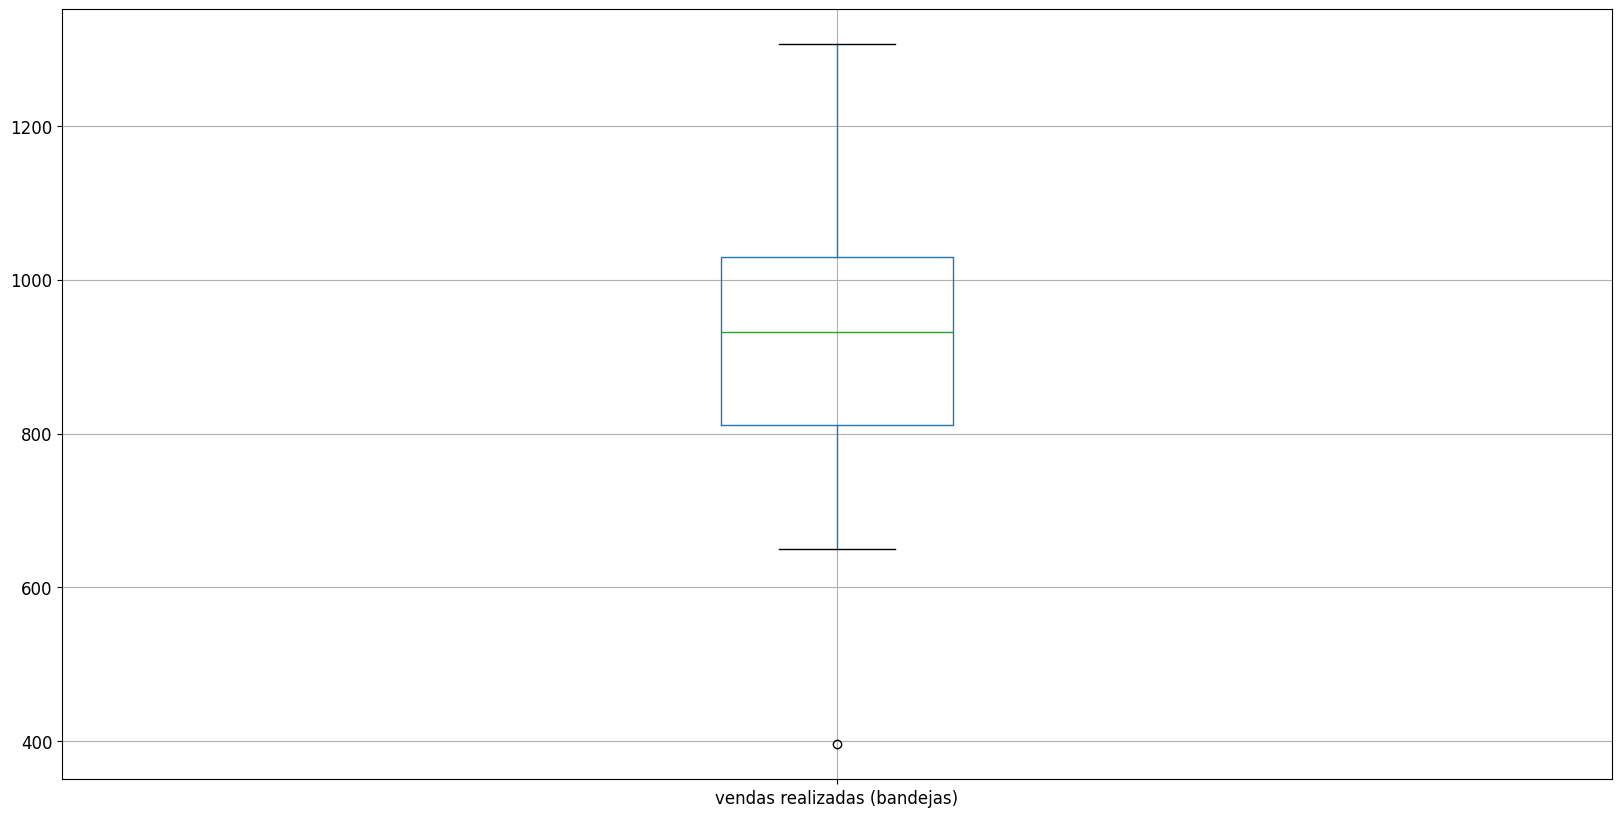

In [56]:
df.boxplot('vendas realizadas (bandejas)',figsize= (20,10), fontsize='large');

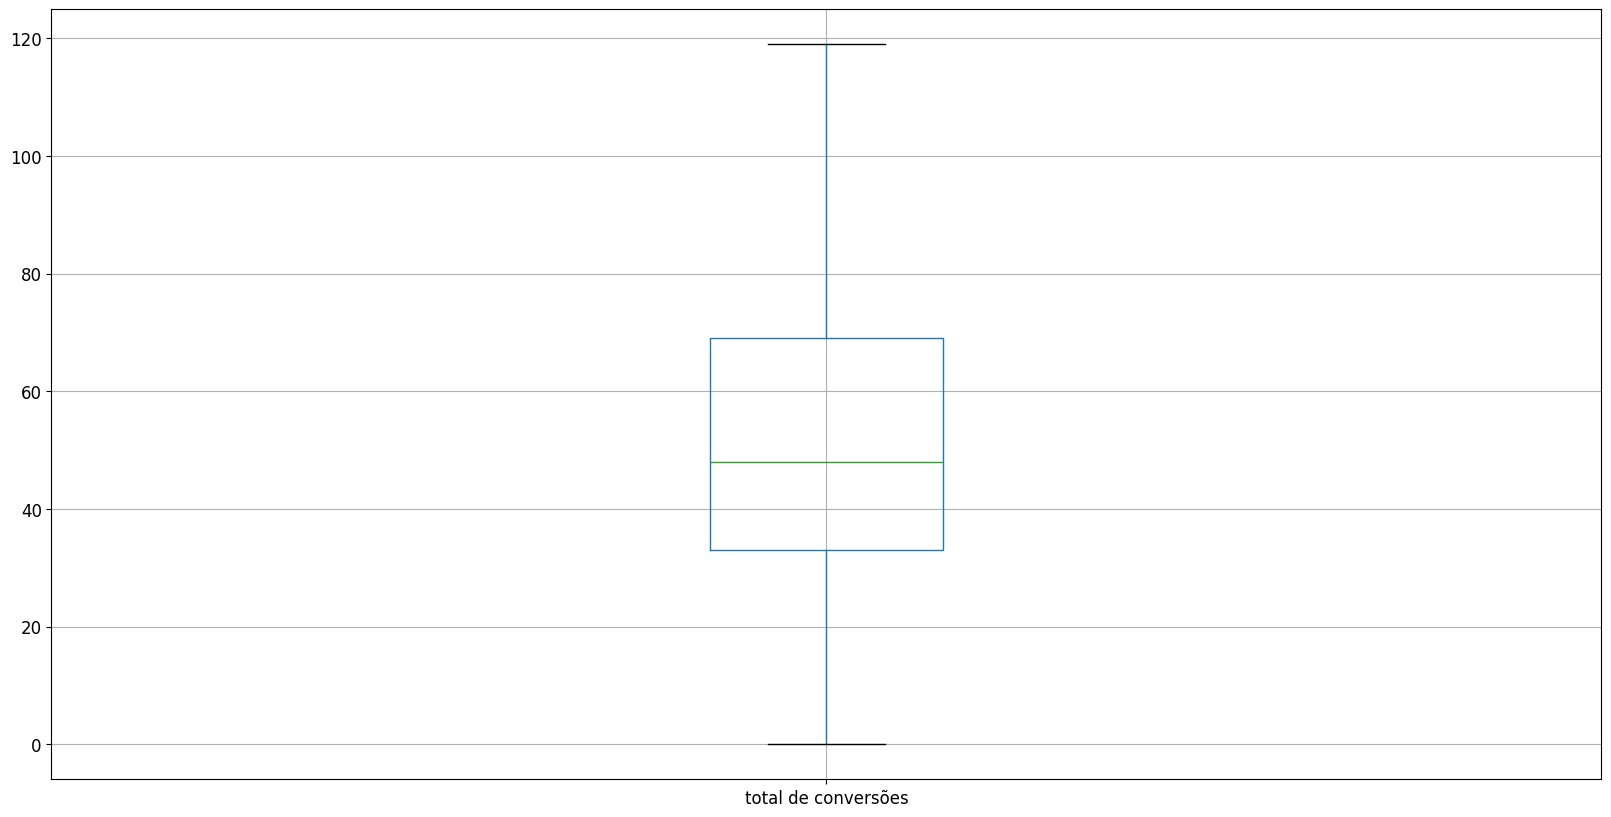

In [57]:
df.boxplot('total de conversões',figsize= (20,10), fontsize='large');

### Criando marcação de data

Formato isocalendar: (YYYY,WW,D), onde o primeiro dia da semana é segunda, e o último é domingo. Como no BI a semana começa na segunda e termina no domingo, os dados de cada semana ficam acumulados para o domingo (i.e. weekday = 7).

É preciso criar uma coluna de data, formando a tupla isocalendar com a coluna ano, combinada com a coluna semana, combinada com o número 7 e aplicando a função date.fromisocalendar(year, week, day).

Primeiro será criada a coluna isoformat, depois a coluna data.

In [58]:
def create_date_from_year_week(year, week):
    """ creates timestamp object from year and week numbers, standardized day is Sunday"""
    return pd.Timestamp.fromisocalendar(year, week, 7)

In [59]:
create_date_from_year_week(2022, 32)

Timestamp('2022-08-14 00:00:00')

In [60]:
year = df['Ano']
week = df['Semana']
date_year_week = lambda x,y: create_date_from_year_week(x,y)
date = list(map(date_year_week, year, week))
df['date']= pd.Series(date)
df

,Ano,Semana,"Ideal, valor",Meta ideal,Meta ajustada,"Semanal, valor","Recomendada, valor",vendas realizadas (bandejas),total de conversões,Equiv. product line,...,var. % movimento,A$% (total -S),B$% (total -S),D$% (total-S),F$% (total -S),K$% (total -S),P$% (total-S),S$% (total -S),$% (Total-S),date
0,2022,26,33.92,310,1185,8.862233,7.106237,396,93,20.310909,...,0.000000,0.021844,0.746230,0.000000,0.142865,0.059561,0.029500,0.054010,1.054010,2022-07-03
1,2022,27,33.92,310,1184,8.872677,7.412368,986,38,44.180579,...,1.488706,0.018014,0.776228,0.001708,0.124981,0.045275,0.033794,0.046888,1.046888,2022-07-10
2,2022,28,33.92,310,1189,8.836661,9.201605,857,81,14.145614,...,-0.130843,0.000000,0.806860,0.011273,0.105074,0.039504,0.037289,0.016776,1.016776,2022-07-17
3,2022,29,33.92,310,1220,8.611724,8.835778,881,90,33.442780,...,0.027750,0.022437,0.752758,0.010623,0.147652,0.019410,0.047120,0.039450,1.039450,2022-07-24
4,2022,30,33.92,310,1205,8.719288,9.886277,1013,94,22.708276,...,0.149653,0.021077,0.735729,0.047528,0.129547,0.031998,0.034121,0.022930,1.022930,2022-07-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,2023,40,48.89,287,1259,11.126583,13.777216,941,31,12.762229,...,0.265761,0.043696,0.663804,0.145576,0.083194,0.016526,0.047205,0.013739,1.013739,2023-10-08
67,2023,41,48.89,287,1238,11.310969,13.380321,889,48,26.699747,...,-0.055364,0.042981,0.667705,0.147047,0.076680,0.024835,0.040752,0.030944,1.030944,2023-10-15
68,2023,42,48.89,287,1248,11.221235,13.777216,872,31,2.495269,...,-0.019471,0.034807,0.682038,0.135985,0.081806,0.020793,0.044571,0.002869,1.002869,2023-10-22
69,2023,43,48.89,287,1241,11.285606,15.632974,812,45,25.299411,...,-0.068170,0.045392,0.669551,0.121681,0.090480,0.024116,0.048780,0.032128,1.032128,2023-10-29


### Variação no tempo

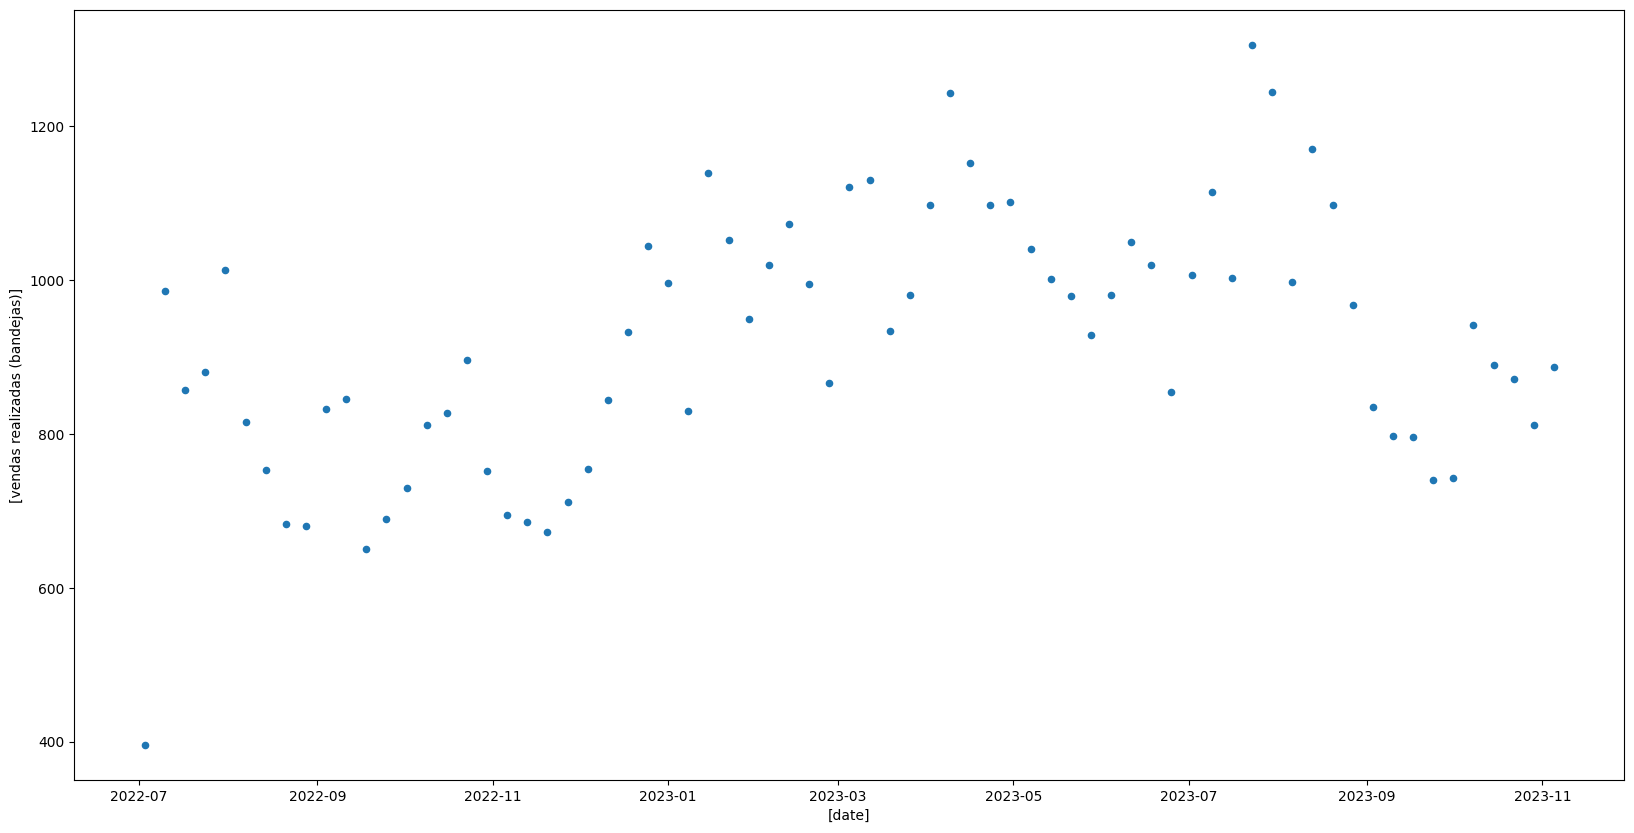

In [69]:
df.plot.scatter(['date'], ['vendas realizadas (bandejas)'], figsize = (20, 10));

### Removendo o primeiro dado

In [71]:
df = df.drop(index=0, axis = 0)
df

,Ano,Semana,"Ideal, valor",Meta ideal,Meta ajustada,"Semanal, valor","Recomendada, valor",vendas realizadas (bandejas),total de conversões,Equiv. product line,...,var. % movimento,A$% (total -S),B$% (total -S),D$% (total-S),F$% (total -S),K$% (total -S),P$% (total-S),S$% (total -S),$% (Total-S),date
1,2022,27,33.92,310,1184,8.872677,7.412368,986,38,44.180579,...,1.488706,0.018014,0.776228,0.001708,0.124981,0.045275,0.033794,0.046888,1.046888,2022-07-10
2,2022,28,33.92,310,1189,8.836661,9.201605,857,81,14.145614,...,-0.130843,0.000000,0.806860,0.011273,0.105074,0.039504,0.037289,0.016776,1.016776,2022-07-17
3,2022,29,33.92,310,1220,8.611724,8.835778,881,90,33.442780,...,0.027750,0.022437,0.752758,0.010623,0.147652,0.019410,0.047120,0.039450,1.039450,2022-07-24
4,2022,30,33.92,310,1205,8.719288,9.886277,1013,94,22.708276,...,0.149653,0.021077,0.735729,0.047528,0.129547,0.031998,0.034121,0.022930,1.022930,2022-07-31
5,2022,31,41.34,254,969,10.839958,10.653415,815,41,28.228892,...,-0.194779,0.021321,0.765057,0.008083,0.148838,0.023054,0.033647,0.035847,1.035847,2022-08-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,2023,40,48.89,287,1259,11.126583,13.777216,941,31,12.762229,...,0.265761,0.043696,0.663804,0.145576,0.083194,0.016526,0.047205,0.013739,1.013739,2023-10-08
67,2023,41,48.89,287,1238,11.310969,13.380321,889,48,26.699747,...,-0.055364,0.042981,0.667705,0.147047,0.076680,0.024835,0.040752,0.030944,1.030944,2023-10-15
68,2023,42,48.89,287,1248,11.221235,13.777216,872,31,2.495269,...,-0.019471,0.034807,0.682038,0.135985,0.081806,0.020793,0.044571,0.002869,1.002869,2023-10-22
69,2023,43,48.89,287,1241,11.285606,15.632974,812,45,25.299411,...,-0.068170,0.045392,0.669551,0.121681,0.090480,0.024116,0.048780,0.032128,1.032128,2023-10-29


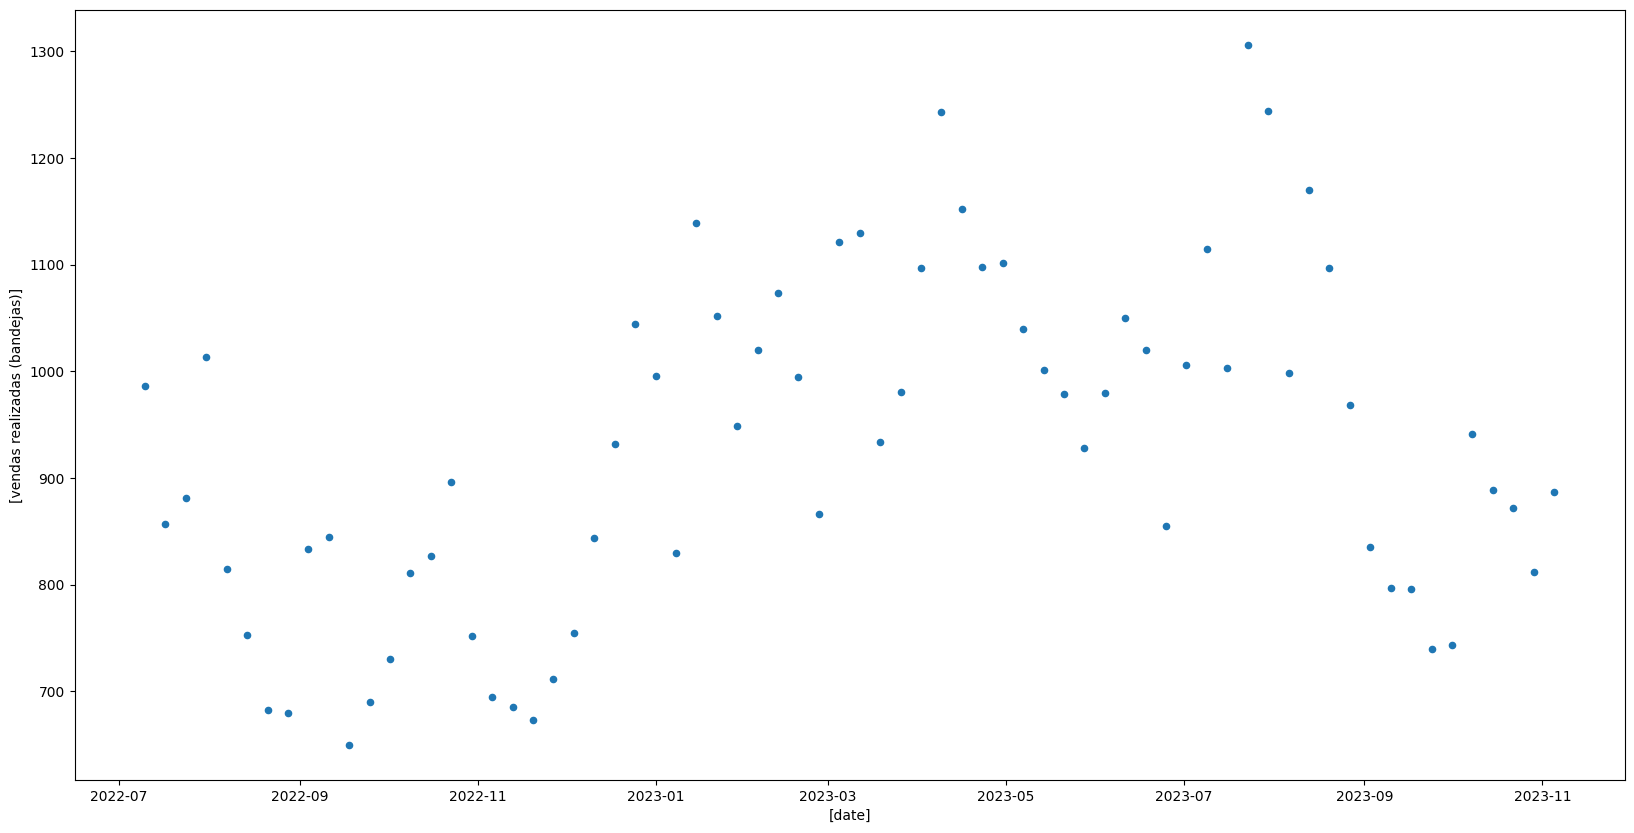

In [72]:
df.plot.scatter(['date'], ['vendas realizadas (bandejas)'], figsize = (20, 10));

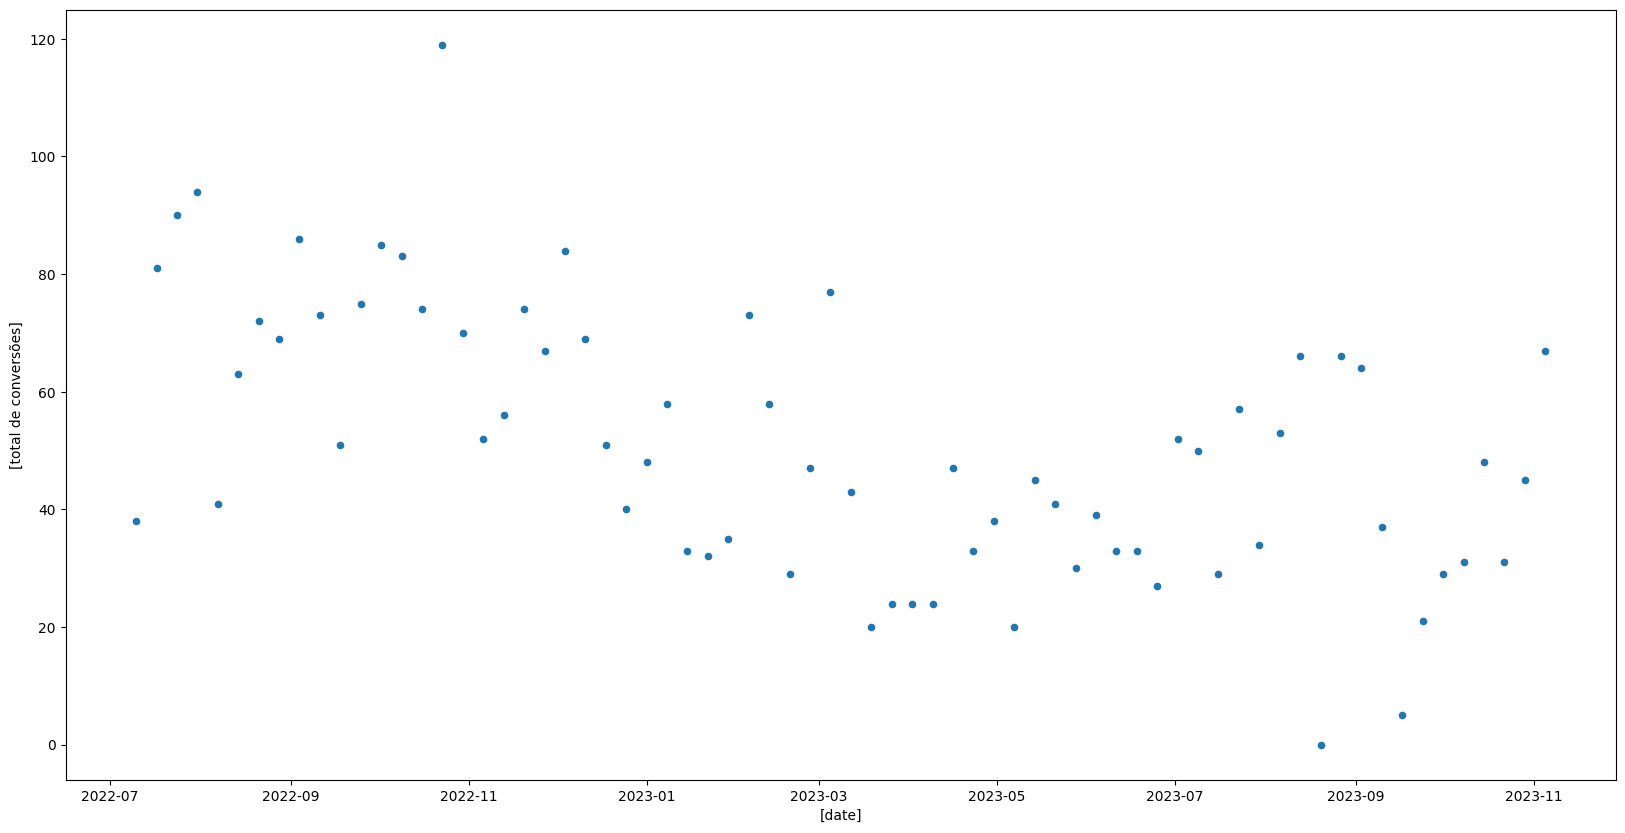

In [73]:
df.plot.scatter(['date'], ['total de conversões'], figsize = (20, 10));

## Análise bi-variada

#dropando as colunas categórias somente para fazer a matriz de correlação
df_correlacao = df.drop('sex', axis = 1)
df_correlacao = df_correlacao.drop('cholesterol class', axis = 1)
df_correlacao = df_correlacao.drop('age', axis = 1)
df_correlacao

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns


corr_matrix = df_correlacao.corr(method = 'pearson') # Matriz de correlação
plt.figure(figsize=(9,9)) # Dimensionamento da figura
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt = '.2f') # Mapa de calor + Matriz
plt.show()

In [81]:
df.columns

Index(['Ano', 'Semana', 'Ideal, valor', 'Meta ideal', 'Meta ajustada',
       'Semanal, valor', 'Recomendada, valor', 'vendas realizadas (bandejas)',
       'total de conversões', 'Equiv. product line',
       'Conversões + Equiv. Prod. Line', 'meta de conversões',
       'Dif. Meta/conversões', 'eficiência de conversão', '% meta de vendas',
       '% valor ideal', 'var. % movimento', 'A$%  (total -S)',
       'B$%  (total -S)', 'D$% (total-S)', 'F$%  (total -S)',
       'K$%  (total -S)', 'P$%  (total-S)', 'S$%  (total -S)', '$%  (Total-S)',
       'date'],
      dtype='object')

In [87]:
df_correlacao = df.drop(labels=['Ano', 'Semana', 'date', 'Equiv. product line', 'Meta ajustada', 'Dif. Meta/conversões', 'eficiência de conversão', '% valor ideal', 'meta de conversões', 'eficiência de conversão', '% meta de vendas',
       '% valor ideal', 'Conversões + Equiv. Prod. Line', 'var. % movimento', 'S$%  (total -S)', '$%  (Total-S)'], axis=1)
df_correlacao

,"Ideal, valor",Meta ideal,"Semanal, valor","Recomendada, valor",vendas realizadas (bandejas),total de conversões,A$% (total -S),B$% (total -S),D$% (total-S),F$% (total -S),K$% (total -S),P$% (total-S)
1,33.92,310,8.872677,7.412368,986,38,0.018014,0.776228,0.001708,0.124981,0.045275,0.033794
2,33.92,310,8.836661,9.201605,857,81,0.000000,0.806860,0.011273,0.105074,0.039504,0.037289
3,33.92,310,8.611724,8.835778,881,90,0.022437,0.752758,0.010623,0.147652,0.019410,0.047120
4,33.92,310,8.719288,9.886277,1013,94,0.021077,0.735729,0.047528,0.129547,0.031998,0.034121
5,41.34,254,10.839958,10.653415,815,41,0.021321,0.765057,0.008083,0.148838,0.023054,0.033647
...,...,...,...,...,...,...,...,...,...,...,...,...
66,48.89,287,11.126583,13.777216,941,31,0.043696,0.663804,0.145576,0.083194,0.016526,0.047205
67,48.89,287,11.310969,13.380321,889,48,0.042981,0.667705,0.147047,0.076680,0.024835,0.040752
68,48.89,287,11.221235,13.777216,872,31,0.034807,0.682038,0.135985,0.081806,0.020793,0.044571
69,48.89,287,11.285606,15.632974,812,45,0.045392,0.669551,0.121681,0.090480,0.024116,0.048780


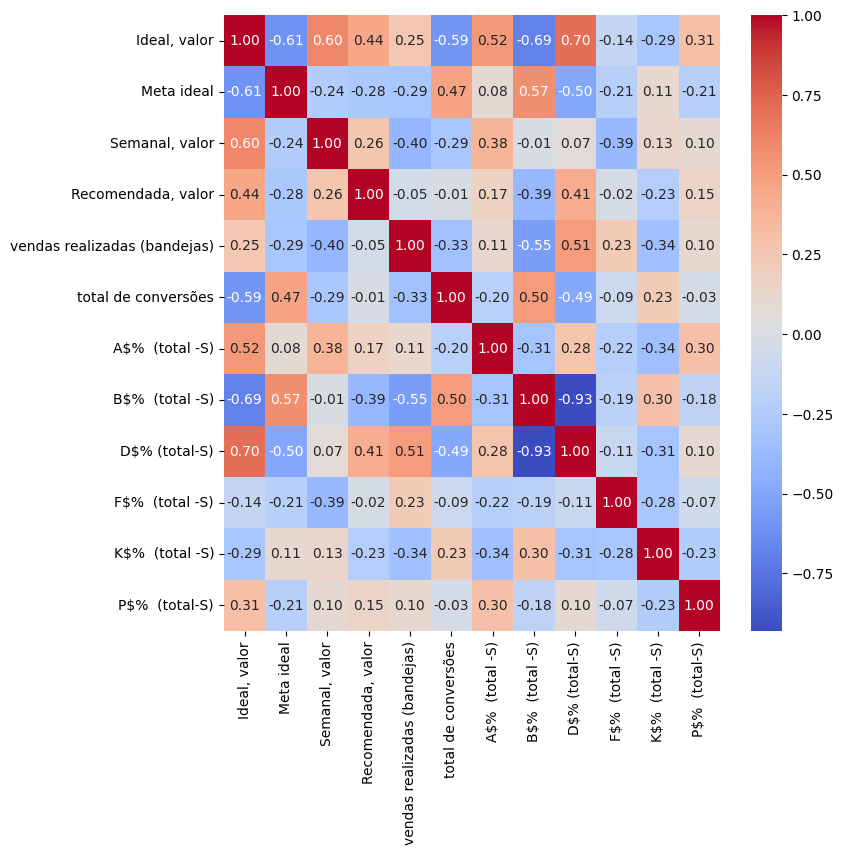

In [89]:
from matplotlib.colors import ListedColormap
corr_matrix = df_correlacao.corr(method = 'pearson') # Matriz de correlação
plt.figure(figsize=(8,8)) # Dimensionamento da figura
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt = '.2f') # Mapa de calor + Matriz
plt.show()

Correlações muito fracas com total de conversão:

- P
- F
- Recomendada, valor

Correlações fracas com total de conversão:

- A
- K
- Semanal, valor

Correlações moderadas com total de conversão:

- Ideal, valor
- Meta, ideal
- vendas realizadas;
- B;
- D;

In [90]:
df_correlacao.columns

Index(['Ideal, valor', 'Meta ideal', 'Semanal, valor', 'Recomendada, valor',
       'vendas realizadas (bandejas)', 'total de conversões',
       'A$%  (total -S)', 'B$%  (total -S)', 'D$% (total-S)',
       'F$%  (total -S)', 'K$%  (total -S)', 'P$%  (total-S)'],
      dtype='object')

In [91]:
rotulos = df_correlacao['total de conversões']
atributos_fracos = df_correlacao.drop(labels = ['total de conversões', 'P$%  (total-S)', 'F$%  (total -S)', 'Recomendada, valor'], axis=1)
atributos_moderados = atributos_fracos.drop(labels = ['A$%  (total -S)', 'K$%  (total -S)', 'Semanal, valor'], axis = 1)

In [92]:
atributos_fracos

,"Ideal, valor",Meta ideal,"Semanal, valor",vendas realizadas (bandejas),A$% (total -S),B$% (total -S),D$% (total-S),K$% (total -S)
1,33.92,310,8.872677,986,0.018014,0.776228,0.001708,0.045275
2,33.92,310,8.836661,857,0.000000,0.806860,0.011273,0.039504
3,33.92,310,8.611724,881,0.022437,0.752758,0.010623,0.019410
4,33.92,310,8.719288,1013,0.021077,0.735729,0.047528,0.031998
5,41.34,254,10.839958,815,0.021321,0.765057,0.008083,0.023054
...,...,...,...,...,...,...,...,...
66,48.89,287,11.126583,941,0.043696,0.663804,0.145576,0.016526
67,48.89,287,11.310969,889,0.042981,0.667705,0.147047,0.024835
68,48.89,287,11.221235,872,0.034807,0.682038,0.135985,0.020793
69,48.89,287,11.285606,812,0.045392,0.669551,0.121681,0.024116


In [93]:
atributos_moderados

,"Ideal, valor",Meta ideal,vendas realizadas (bandejas),B$% (total -S),D$% (total-S)
1,33.92,310,986,0.776228,0.001708
2,33.92,310,857,0.806860,0.011273
3,33.92,310,881,0.752758,0.010623
4,33.92,310,1013,0.735729,0.047528
5,41.34,254,815,0.765057,0.008083
...,...,...,...,...,...
66,48.89,287,941,0.663804,0.145576
67,48.89,287,889,0.667705,0.147047
68,48.89,287,872,0.682038,0.135985
69,48.89,287,812,0.669551,0.121681


In [94]:
rotulos

1     38
2     81
3     90
4     94
5     41
      ..
66    31
67    48
68    31
69    45
70    67
Name: total de conversões, Length: 70, dtype: int64